<a href="https://colab.research.google.com/github/umitrsm/drawapp/blob/master/clustering_with_text_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# New Section

# New Section

In [ ]:
df = pd.read_excel("yorumlar.xlsx")

In [ ]:
df.head()

,Cümle,Durum
0,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
1,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
2,Turkcell çok pahalı ya,olumsuz
3,Turkcell Kaş'ta internetin cekmiyor,olumsuz
4,Turkcell'in Allah belası versin demek isterdim...,olumsuz


In [ ]:
df["Cümle"]=df["Cümle"].apply(lambda x: word_tokenize(x.lower()))
df.head()

,Cümle,Durum
0,"[20, dk, 1, gb, internet, 500, mb, sadece, kaş...",olumsuz
1,"[ayrıca, turkcell, superonline, reklamı, kadar...",olumsuz
2,"[turkcell, çok, pahalı, ya]",olumsuz
3,"[turkcell, kaş'ta, internetin, cekmiyor]",olumsuz
4,"[turkcell'in, allah, belası, versin, demek, is...",olumsuz


In [ ]:
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["Cümle"]=df["Cümle"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('turkish')
df["Cümle"]=df["Cümle"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["Cümle"]=df["Cümle"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["Cümle"]=df["Cümle"].apply(lambda x: " ".join(x))

In [ ]:
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words={'turkish'})
    X = vectorizer.fit_transform(df["Cümle"])

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


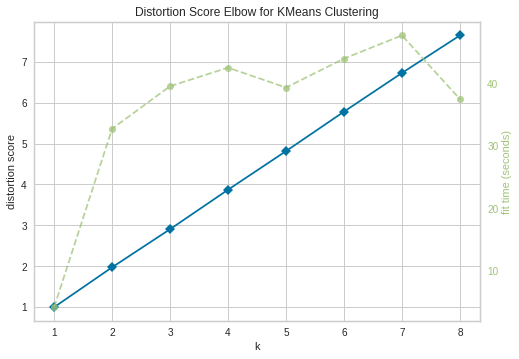

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1, 9))
visu.fit(X)
visu.poof()

In [ ]:
kmeans_model = KMeans(n_clusters=3).fit(X)

In [ ]:
pred = kmeans_model.predict(X)
print(pred)

[2 0 2 ... 0 2 2]


In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 1735,  1156, 10940]))

In [ ]:
df["clusters"] = pred
df.head()

,Cümle,Durum,clusters
0,dk gb internet mb sadece kaşar turkcell düşer ...,olumsuz,2
1,ayrıca turkcell superonline reklamı kadar kötü...,olumsuz,0
2,turkcell pahalı,olumsuz,2
3,turkcell internetin cekmiyor,olumsuz,2
4,allah belası versin demek isterdim demicem dem...,olumsuz,0


In [ ]:
df[df["clusters"]==0]

,Cümle,Durum,clusters
1,ayrıca turkcell superonline reklamı kadar kötü...,olumsuz,0
4,allah belası versin demek isterdim demicem dem...,olumsuz,0
20,interneti kadar rezil bir olamaz,olumsuz,0
29,turkcell yapsa internet düzelmez bir fotoğrafı...,olumsuz,0
39,köşede yavaşlıktan ölen bir adet turkcell,olumsuz,0
...,...,...,...
13708,sonhaberver srkninci bir hafta sonra deniyorum...,olumsuz,0
13727,turkcell tam bir oç sun,olumsuz,0
13758,turkcell fatura hesap kesim tarihi geldi gün i...,olumsuz,0
13802,superonlinetr eski bir turkcell calisani olara...,olumsuz,0


In [ ]:
positive =  df[df["clusters"]==1]
notr = df[df["clusters"]==2]
negative= df[df["clusters"]==0]

In [ ]:
df[df["clusters"]==1]

,Cümle,Durum,clusters
915,turkcell bekle devam youtube açamıyorsun http,olumsuz,1
939,zalimsin turkcell d http,olumsuz,1
995,turkcell cüzdan hakkında bilgisi yok müşteri t...,olumsuz,1
1094,tebrikler türkiyem turkcell beni cok daraltiyo...,olumsuz,1
1134,barbara diyen kız http alkislarlayasiyorum alk...,olumsuz,1
...,...,...,...
11537,turkcell kredi notu sorgulaması http http,notr,1
11555,tatlı dilliyim coğu zaman biberli turkcell pla...,notr,1
12746,i at turkcell global bilgi in türkiye,notr,1
13032,turkcell toprak şarkısını dinliyorum sen dinle...,notr,1


In [ ]:
from wordcloud import WordCloud

In [ ]:
col_pos= " ".join(positive["Cümle"])

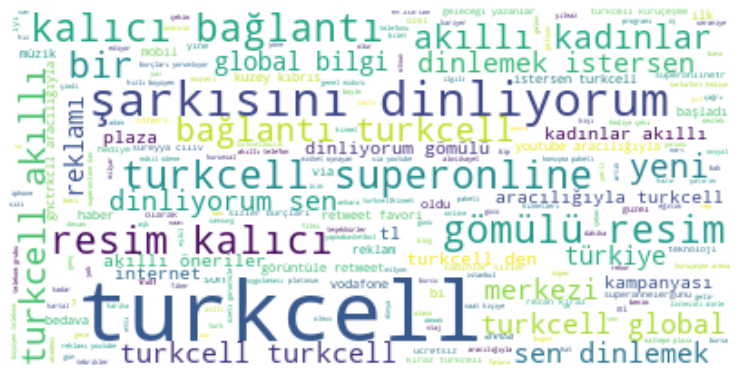

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(col_pos)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
col_neg = " ".join(negative["Cümle"])

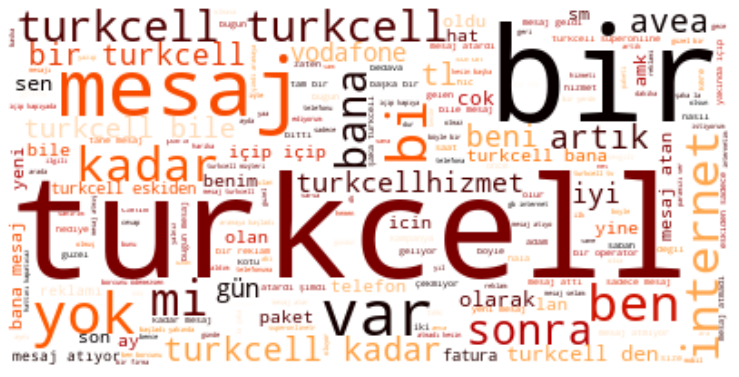

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=1000, colormap="gist_heat")
wordcloud.generate(col_neg)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
col_nr = " ".join(notr["Cümle"])

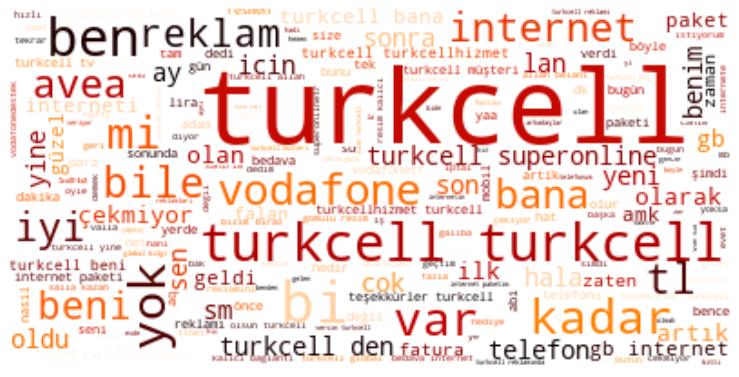

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=1000, colormap="gist_heat")
wordcloud.generate(col_nr)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
clusters =  kmeans_model.labels_

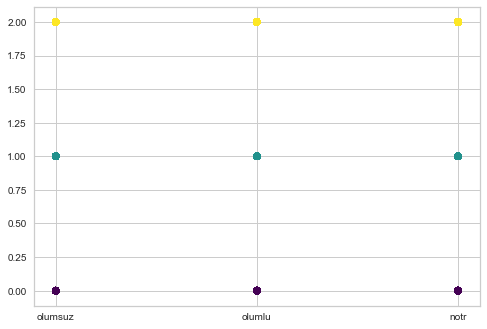

In [ ]:
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=clusters, cmap="viridis")